
# Data processing ane exploration for text data 
- The codes in this notebook are modified from various sources, including this [tutorial](http://www.data-analysis-in-python.org/t_text_analysis.html#), this [tutorial](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/), and this [tutorial](https://www.digitalvidya.com/blog/an-introduction-to-text-analysis-in-python/). 
- [This book](https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/#toc-start) is also very helpful. 
- All codes are for educational purposes only and released under the MIT licence. 

# import the data 

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('reviews_of_Douban.csv')
df.head()

,������,����,����ʱ��,Commental title,Review main body,�޳���,������.1,�ظ���
0,___MONA,����,2021/9/19 15:40,"Space and symbol metaphor analysis of ""squid g...","(First, the public number: ___, welcome attent...",2549.0,120.0,477��Ӧ
1,��˹�ص�,����,2021/9/20 14:27,I hate those reasonable comments,The game design in this TV series is a morphol...,1158.0,149.0,254��Ӧ
2,��,����,2021/9/19 19:41,"I am gambling horses, I don't work, I am old b...",The Father is the father of all beings. I was ...,1008.0,123.0,553��Ӧ
3,����,��������,2021/9/19 23:42,"The man is not the Father, but fake, bad, not ...","After reading my biggest question, how can peo...",727.0,131.0,613��Ӧ
4,�� ��,����,2021/9/23 13:47,Kong Liu fan Li Zheng slaughtered the result o...,"I as an example, let's talk about the plot and...",350.0,34.0,67��Ӧ


In [5]:
df_reviews_title = pd.DataFrame(df['Commental title'], columns=['Commental title'])

In [6]:
df_reviews_title.head()

,Commental title
0,"Space and symbol metaphor analysis of ""squid g..."
1,I hate those reasonable comments
2,"I am gambling horses, I don't work, I am old b..."
3,"The man is not the Father, but fake, bad, not ..."
4,Kong Liu fan Li Zheng slaughtered the result o...


# Mining the text

## Basic Feature Extraction

In [7]:
# number of characters per row

df_reviews_title['char_count'] = df_reviews_title['Commental title'].str.len()  ## this also includes spaces

df_reviews_title.head()

,Commental title,char_count
0,"Space and symbol metaphor analysis of ""squid g...",98
1,I hate those reasonable comments,32
2,"I am gambling horses, I don't work, I am old b...",75
3,"The man is not the Father, but fake, bad, not ...",63
4,Kong Liu fan Li Zheng slaughtered the result o...,68


In [8]:
string = str(df_reviews_title)
print(string.split())
len(string.split())

['Commental', 'title', 'char_count', '0', 'Space', 'and', 'symbol', 'metaphor', 'analysis', 'of', '"squid', 'g...', '98', '1', 'I', 'hate', 'those', 'reasonable', 'comments', '32', '2', 'I', 'am', 'gambling', 'horses,', 'I', "don't", 'work,', 'I', 'am', 'old', 'b...', '75', '3', 'The', 'man', 'is', 'not', 'the', 'Father,', 'but', 'fake,', 'bad,', 'not', '...', '63', '4', 'Kong', 'Liu', 'fan', 'Li', 'Zheng', 'slaughtered', 'the', 'result', 'o...', '68', '...', '...', '...', '1115', 'Poster', '6', '1116', 'Looking', 'forward,', 'bigger,', 'the', 'bigger', 'disappoint...', '50', '1117', 'Details', 'disclose', 'distort', '24', '1118', 'Everything', 'is', 'a', '"human', 'nature"', 'game.', '36', '1119', 'Works', 'that', "don't", 'cover', 'your', 'job', '31', '[1120', 'rows', 'x', '2', 'columns]']


97

In [9]:
# define an embedded function to find the number of words per row

df_reviews_title['word_count'] = df_reviews_title['Commental title'].apply(
    lambda ttl: len(str(ttl).split()))
df_reviews_title.head()

,Commental title,char_count,word_count
0,"Space and symbol metaphor analysis of ""squid g...",98,15
1,I hate those reasonable comments,32,5
2,"I am gambling horses, I don't work, I am old b...",75,18
3,"The man is not the Father, but fake, bad, not ...",63,12
4,Kong Liu fan Li Zheng slaughtered the result o...,68,13


## Basic text processing
- this step is normally called text normalization 

In [10]:
# removing the empty values

df_reviews_title['Commental title'] = df_reviews_title['Commental title'].fillna("")

In [11]:
# converting all letters to lower case
# lambda ttl: " ".join(word.lower() for word in ttl.split())

df_reviews_title['Commental title'] = df_reviews_title['Commental title'].apply(
    lambda ttl: " ".join(wrd.lower() for wrd in ttl.split()))
df_reviews_title['Commental title'].head()

0    space and symbol metaphor analysis of "squid g...
1                     i hate those reasonable comments
2    i am gambling horses, i don't work, i am old b...
3    the man is not the father, but fake, bad, not ...
4    kong liu fan li zheng slaughtered the result o...
Name: Commental title, dtype: object

In [12]:
# removing all punctuations, which are specified with regular expression "[^\w\s]"

df_reviews_title['Commental title'] = df_reviews_title['Commental title'].str.replace('[^\w\s]', '')
df_reviews_title['Commental title'].head()

<ipython-input-12-acd1143702ee>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reviews_title['Commental title'] = df_reviews_title['Commental title'].str.replace('[^\w\s]', '')


0    space and symbol metaphor analysis of squid ga...
1                     i hate those reasonable comments
2    i am gambling horses i dont work i am old but ...
3    the man is not the father but fake bad not sel...
4    kong liu fan li zheng slaughtered the result o...
Name: Commental title, dtype: object

## Do come counting

In [11]:
!pip install nltk

In [13]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/takasugi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# import stop words

from nltk.corpus import stopwords

stop = stopwords.words('english')
type(stop)

list

In [22]:
# extend stop words
new=['bit', 'think', 'something','episode','serie','nan','watch','dont','feel','thing','really','lot','many','netflix','even','see','made','much','keep','im'
,'every','nan nan','got','ive','u','may','2','know','squid','get','would','say','well','seen','that','yes','couldnt','go','didnt','everything','still','nothing','way','far','one','game']
stop.extend(new)


In [23]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
# removing stop words in sentence
df_reviews_title['Commental title']= df_reviews_title['Commental title'].apply(
    lambda ttl:  " ".join(wrd for wrd in ttl.split() if wrd not in stop))
df_reviews_title['Commental title'].head()

0    space symbol metaphor analysis social rules co...
1                             hate reasonable comments
2                 gambling horses work old good father
3                    man father fake bad selfknowledge
4    kong liu fan li zheng slaughtered result ear f...
Name: Commental title, dtype: object

In [25]:
string = ' '.join(df_reviews_title['Commental title'])
string

'space symbol metaphor analysis social rules concentrated human nature hate reasonable comments gambling horses work old good father man father fake bad selfknowledge kong liu fan li zheng slaughtered result ear fan unwaken discover first 8 episodes exciting 9th doramen want take little bad makeup ordinary people evil words plagiarism latcoma desire theory head greater content treatment time world world net fly finally successful entry dating method children adults color symbols games severe spoiler cautious reality hell big escape long mens story live episodes mens looks frown backbound second exposes ending protagonist personal guess directors intention curious necessary directly escape model saved drama survival humanity decrypt red man organization micro _ like amazing disappointment 5 sentences summary drama director tell us also believe people three conjectures games childlike hell net brush screen 19 banned new drama saw adrenaline madness kind gas notes strongest drama eightcha

In [26]:
lst = string.split()
lst

['space',
 'symbol',
 'metaphor',
 'analysis',
 'social',
 'rules',
 'concentrated',
 'human',
 'nature',
 'hate',
 'reasonable',
 'comments',
 'gambling',
 'horses',
 'work',
 'old',
 'good',
 'father',
 'man',
 'father',
 'fake',
 'bad',
 'selfknowledge',
 'kong',
 'liu',
 'fan',
 'li',
 'zheng',
 'slaughtered',
 'result',
 'ear',
 'fan',
 'unwaken',
 'discover',
 'first',
 '8',
 'episodes',
 'exciting',
 '9th',
 'doramen',
 'want',
 'take',
 'little',
 'bad',
 'makeup',
 'ordinary',
 'people',
 'evil',
 'words',
 'plagiarism',
 'latcoma',
 'desire',
 'theory',
 'head',
 'greater',
 'content',
 'treatment',
 'time',
 'world',
 'world',
 'net',
 'fly',
 'finally',
 'successful',
 'entry',
 'dating',
 'method',
 'children',
 'adults',
 'color',
 'symbols',
 'games',
 'severe',
 'spoiler',
 'cautious',
 'reality',
 'hell',
 'big',
 'escape',
 'long',
 'mens',
 'story',
 'live',
 'episodes',
 'mens',
 'looks',
 'frown',
 'backbound',
 'second',
 'exposes',
 'ending',
 'protagonist',
 'pe

In [27]:
srs = pd.Series(lst)
srs

0          space
1         symbol
2       metaphor
3       analysis
4         social
          ...   
3872       human
3873      nature
3874       works
3875       cover
3876         job
Length: 3877, dtype: object

In [28]:
srs.value_counts()

drama       62
people      56
good        52
life        44
humanity    43
            ..
actors       1
coffee       1
tailored     1
911          1
instant      1
Length: 1648, dtype: int64

In [29]:
freq_common = srs.value_counts()[:10]
freq_common

drama       62
people      56
good        52
life        44
humanity    43
human       42
male        33
man         32
korean      30
games       29
dtype: int64

In [30]:
freq_common = srs.value_counts()[-10:]
freq_common

kingdom      1
echo         1
indirect     1
everyones    1
pot          1
actors       1
coffee       1
tailored     1
911          1
instant      1
dtype: int64

In [31]:
# removing non-English characters


def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i) < 128)

df_reviews_title['Commental title'] = df_reviews_title['Commental title'].apply(remove_non_ascii)

df_reviews_title['Commental title']

0       space symbol metaphor analysis social rules co...
1                                hate reasonable comments
2                    gambling horses work old good father
3                       man father fake bad selfknowledge
4       kong liu fan li zheng slaughtered result ear f...
                              ...                        
1115                                               poster
1116         looking forward bigger bigger disappointment
1117                             details disclose distort
1118                                         human nature
1119                                      works cover job
Name: Commental title, Length: 1120, dtype: object

In [32]:
# Stemming
from nltk.stem import PorterStemmer

st = PorterStemmer()
df_reviews_title['Commental title'].apply(
    lambda ttl: " ".join([st.stem(wrd) for wrd in ttl.split()]))

0       space symbol metaphor analysi social rule conc...
1                                     hate reason comment
2                         gambl hors work old good father
3                        man father fake bad selfknowledg
4       kong liu fan li zheng slaughter result ear fan...
                              ...                        
1115                                               poster
1116                look forward bigger bigger disappoint
1117                               detail disclos distort
1118                                          human natur
1119                                       work cover job
Name: Commental title, Length: 1120, dtype: object

In [33]:
# Lemmatization
from textblob import Word

df_reviews_title['Commental title'] =df_reviews_title['Commental title'].apply(
    lambda ttl: " ".join([Word(wrd).lemmatize() for wrd in ttl.split()]))
df_reviews_title['Commental title']

0       space symbol metaphor analysis social rule con...
1                                 hate reasonable comment
2                     gambling horse work old good father
3                       man father fake bad selfknowledge
4       kong liu fan li zheng slaughtered result ear f...
                              ...                        
1115                                               poster
1116         looking forward bigger bigger disappointment
1117                              detail disclose distort
1118                                         human nature
1119                                       work cover job
Name: Commental title, Length: 1120, dtype: object

In [34]:
import numpy as np

df_reviews_title['Commental title'] =df_reviews_title['Commental title'].str.replace('\d+', '')
df_reviews_title['Commental title'].replace(' ', np.nan, inplace=True)
df_reviews_title['Commental title']

<ipython-input-34-047bb98a8e4f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reviews_title['Commental title'] =df_reviews_title['Commental title'].str.replace('\d+', '')


0       space symbol metaphor analysis social rule con...
1                                 hate reasonable comment
2                     gambling horse work old good father
3                       man father fake bad selfknowledge
4       kong liu fan li zheng slaughtered result ear f...
                              ...                        
1115                                               poster
1116         looking forward bigger bigger disappointment
1117                              detail disclose distort
1118                                         human nature
1119                                       work cover job
Name: Commental title, Length: 1120, dtype: object

In [35]:
!pip install matplotlib
!pip install wordcloud

In [36]:
from textblob import TextBlob

TextBlob(df_reviews_title['Commental title'] [10]).words

WordList(['latcoma', 'desire', 'theory'])

In [37]:
TextBlob(df_reviews_title['Commental title'] [3]).ngrams(2)

[WordList(['man', 'father']),
 WordList(['father', 'fake']),
 WordList(['fake', 'bad']),
 WordList(['bad', 'selfknowledge'])]

In [38]:
TextBlob(df_reviews_title['Commental title'] [7]).ngrams(3)

[WordList(['want', 'take', 'little']),
 WordList(['take', 'little', 'bad']),
 WordList(['little', 'bad', 'makeup'])]

In [84]:
# TF
tf1 = df_reviews_title['Commental title'].apply(lambda x: pd.value_counts(x.split(" "))).sum(
    axis=0).reset_index()

tf1.columns = ['words', 'tf']
DOUBAN_标题_head_100=tf1.sort_values(['tf'], ascending=False).head(100)
DOUBAN_标题_head_100.to_csv('DOUBAN_标题_top_100.csv')
DOUBAN_标题_head_100

,words,tf
32,,124.0
94,drama,65.0
43,people,56.0
12,good,52.0
127,life,44.0
...,...,...
149,participate,7.0
630,vip,7.0
141,let,7.0
209,small,7.0


In [40]:
fp=DOUBAN_标题_head_100
word = list(fp.words)#词
value = fp.tf#词的频率
for i in range(len(word)):
    word[i] = word[i]
dic = dict(zip(word, value))#词频以字典形式存储

In [41]:
dic

{'': 124.0,
 'drama': 65.0,
 'people': 56.0,
 'good': 52.0,
 'life': 44.0,
 'humanity': 43.0,
 'human': 42.0,
 'korean': 34.0,
 'male': 33.0,
 'man': 32.0,
 'want': 29.0,
 'game': 29.0,
 'film': 27.0,
 'world': 26.0,
 'cant': 23.0,
 'look': 20.0,
 'evil': 20.0,
 'nature': 20.0,
 'men': 19.0,
 'big': 19.0,
 'point': 19.0,
 'play': 19.0,
 'also': 18.0,
 'like': 17.0,
 'person': 17.0,
 'escape': 17.0,
 'story': 16.0,
 'high': 16.0,
 'old': 15.0,
 'last': 15.0,
 'end': 15.0,
 'money': 14.0,
 'survival': 14.0,
 'bad': 14.0,
 'view': 13.0,
 'write': 13.0,
 'ending': 13.0,
 'little': 13.0,
 'feeling': 13.0,
 'plot': 12.0,
 'fire': 12.0,
 'real': 12.0,
 'poor': 12.0,
 'first': 12.0,
 'spoiler': 12.0,
 'two': 12.0,
 'episode': 11.0,
 'talk': 11.0,
 'time': 11.0,
 'set': 11.0,
 'personal': 10.0,
 'protagonist': 10.0,
 'second': 10.0,
 'live': 10.0,
 'three': 10.0,
 'version': 10.0,
 'kind': 10.0,
 'reading': 10.0,
 'analysis': 10.0,
 'rule': 10.0,
 'cool': 9.0,
 'take': 9.0,
 'police': 9.0,
 'wo

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
# Learn vocabulary and idf, return term-document matrix.
doc_term_scores = vectorizer.fit_transform(df_reviews_title['Commental title'])
print(vectorizer.get_feature_names())

['__', '___', '____', '_hand_', 'ability', 'able', 'absolute', 'absolutely', 'absurd', 'abused', 'accept', 'accepting', 'accident', 'according', 'achieve', 'acting', 'actor', 'actually', 'actuator', 'add', 'addiction', 'addition', 'adjacent', 'adrenaline', 'adult', 'advanced', 'advantage', 'aerodynamic', 'aesthetic', 'affect', 'afford', 'afraid', 'aircraft', 'ali', 'alice', 'alienation', 'allinlaw', 'already', 'also', 'although', 'always', 'amazing', 'ambition', 'america', 'american', 'analysis', 'analyze', 'analyzed', 'analyzes', 'ancient', 'angle', 'angry', 'animal', 'annotation', 'annual', 'another', 'ant', 'antiutin', 'anxiety', 'anyone', 'anything', 'around', 'article', 'asian', 'ask', 'assistant', 'association', 'attached', 'attended', 'attention', 'attract', 'attracts', 'audience', 'audiovisual', 'auxiliary', 'avenue', 'awake', 'award', 'away', 'awkward', 'ba', 'baby', 'back', 'backbound', 'background', 'bad', 'ban', 'bang', 'banned', 'banquet', 'baohaus', 'bare', 'barely', 'bas

In [44]:
print(doc_term_scores.shape)

(1120, 1515)


In [45]:
from wordcloud import WordCloud
import PIL.Image as image
import numpy as np
import matplotlib.pyplot as plt
import jieba as jieba

In [46]:
from PIL import Image

In [47]:
import imageio
import matplotlib.pyplot as plt

In [48]:
from os import path

In [49]:
mg=np.array(Image.open(path.join(r'/Users/takasugi/Downloads/9998.png')))
mg

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

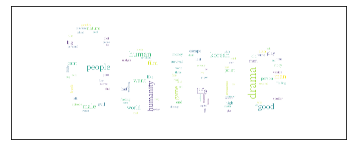

In [80]:
word_cloud = WordCloud(
    font_path=r'/Users/takasugi/Downloads/SourceHanSerifCN-VF.otf',
    background_color='white',
        # 设置背景宽
    width=600,
        # 设置背景高
    height=1000,
        # 最大字体
    max_font_size=80,
        # 最小字体
    min_font_size=10,
    scale=5,
    mask=mg,
    mode='RGBA')
word_cloud.fit_words(dic)
plt.imshow(word_cloud)
plt.xticks([])#去掉横坐标
plt.yticks([])#去掉纵坐标
plt.show()

In [82]:
wc.to_file('豆瓣前一百tf_titles_wc.png')

In [83]:
imdb_title_tail_100=tf1.sort_values(['tf'], ascending=False).tail(100)
imdb_title_tail_100.to_csv('DOUBAN_标题_tail_100.csv')